In [1]:
import networkit as nk
import networkx as nx
import girg_sampling.girgs as girgs
import matplotlib.pyplot as plt
import numpy as np

from benji_girgs import *

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
def cgirg_gen(n, d, tau, alpha):
    weights = girgs.generateWeights(n, tau)
    pts = girgs.generatePositions(n, d)
    edges = girgs.generateEdges(weights, pts, alpha)
    return edges, weights, pts
    
def cgirg_gen2(n, d, tau, alpha):
    edges, weights, pts = cgirg_gen(n, d, tau, alpha)
    g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))
    return g, edges, weights, pts
    

In [40]:
n = 1000
d = 2
tau=2.9
alpha = 3.0
g, edges, weights, pts = cgirg_gen2(n, d, tau, alpha)
nk.overview(g)

Network Properties:
nodes, edges			1000, 6078
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.012168
clustering coefficient		0.600221
min/max/avg degree		1, 258, 12.156000
degree assortativity		0.179237
number of connected components	1
size of largest component	1000 (100.00 %)


In [4]:
n = 1000
d = 2
tau=2.2
alpha = 3.0

weights = generateWeights(n, tau)
pts = generatePositions(n, d)
wbar = (tau-1)/(tau-2)
pts = pts * (wbar**(1/d))
edges = generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_numpy_array(edges))
wbar
np.mean(weights)
nk.overview(g)

/cluster/home/bdayan/girgs/benji_src/benji_girgs.py:180: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


5.999999999999996

6.2117168347726475

Network Properties:
nodes, edges			1000, 74348
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.148845
clustering coefficient		0.409810
min/max/avg degree		49, 999, 148.696000
degree assortativity		-0.104506
number of connected components	1
size of largest component	1000 (100.00 %)


In [5]:
n = 1000
d = 2
tau=2.2
alpha = 3.0

weights = generateWeights(n, tau)
pts = generatePositions(n, d)
# wbar = (tau-1)/(tau-2)
wbar = np.mean(weights)
pts = pts * (wbar**(1/d))

outer = np.outer(weights, weights)
n, d = pts.shape
dists = get_dists_julia(pts, (n*wbar)**(1/d))
p_uv = np.divide(outer, dists**d)  
p_uv = np.minimum(p_uv, 1)
p_uv = np.power(p_uv, alpha)

probs = p_uv
unif_mat = np.random.uniform(size=probs.shape)
edges = np.triu((unif_mat < probs).astype(np.uint), 1)

np.mean(weights)
(tau-1)/(tau-2)

g = nk.nxadapter.nx2nk(nx.from_numpy_array(edges))
nk.overview(g)

/scratch/tmp.11967453.bdayan/ipykernel_37655/1266231914.py:15: RuntimeWarning: divide by zero encountered in divide
  p_uv = np.divide(outer, dists**d)


6.376991431731165

5.999999999999996

Network Properties:
nodes, edges			1000, 8588
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.017193
clustering coefficient		0.813643
min/max/avg degree		1, 999, 17.176000
degree assortativity		-0.239477
number of connected components	1
size of largest component	1000 (100.00 %)


In [32]:
n = 1000
d = 2
tau=2.9
alpha = 3.0


g, edges, weights, pts = generate_GIRG_nk(n=n, d=d, tau=tau, alpha=alpha)
# wbar
np.mean(weights)
nk.overview(g)

2.1103136410105714

Network Properties:
nodes, edges			1000, 12936
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025898
clustering coefficient		0.620750
min/max/avg degree		5, 545, 25.872000
degree assortativity		-0.083490
number of connected components	1
size of largest component	1000 (100.00 %)


In [42]:
n = 10000
d = 2
tau=2.9
alpha = 3.0


%time g, edges, weights, pts = generate_GIRG_nk(n=n, d=d, tau=tau, alpha=alpha)
np.mean(weights)
nk.overview(g)

CPU times: user 10.5 s, sys: 1.58 s, total: 12.1 s
Wall time: 12.1 s


2.053427240601988

Network Properties:
nodes, edges			10000, 126435
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002529
clustering coefficient		0.605270
min/max/avg degree		2, 1786, 25.287000
degree assortativity		-0.021085
number of connected components	1
size of largest component	10000 (100.00 %)


CPU times: user 8.09 s, sys: 137 ms, total: 8.23 s
Wall time: 8.15 s
Network Properties:
nodes, edges			99945, 637778
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.000128
clustering coefficient		0.615034
min/max/avg degree		1, 2955, 12.762579
degree assortativity		0.148287
number of connected components	6
size of largest component	99935 (99.99 %)


In [22]:
%time _= cgirg_gen2(n, d, tau, alpha)

CPU times: user 13.7 s, sys: 315 ms, total: 14 s
Wall time: 13.9 s


In [15]:
from tqdm import tqdm

In [26]:
n=10000
d=2
tau=2.2
alpha=2.0
pts = girgs.generatePositions(n, d)
# pts = np.array(pts)
# pts = pts * (n**(1/d))
# pts = pts.tolist()

weights = girgs.generateWeights(n, ple=tau)
edges = girgs.generateEdges(weights, pts, alpha)
g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))


def avg_degree(g):
    return np.mean(nk.centrality.DegreeCentrality(g).run().scores())
avg_degrees = []

for _ in tqdm(range(20)):
    weights = girgs.generateWeights(n, ple=tau)
    edges = girgs.generateEdges(weights, pts, alpha)
    pts = girgs.generatePositions(n, d)
    g = nk.nxadapter.nx2nk(nx.from_edgelist(edges))
    avg_degrees.append(avg_degree(g))
    
np.mean(avg_degrees)
np.std(avg_degrees)
np.max(avg_degrees)


100%|██████████| 20/20 [00:27<00:00,  1.36s/it]


31.76504205920593

0.642286115950436

32.9676

In [ ]:
def q

In [ ]:
%time 

In [13]:
nk.overview(g)

Network Properties:
nodes, edges			1000, 13013
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.026052
clustering coefficient		0.717725
min/max/avg degree		3, 687, 26.026000
degree assortativity		-0.252889
number of connected components	1
size of largest component	1000 (100.00 %)


In [8]:
foo = np.array(edges)

In [11]:
np.max(foo)

999

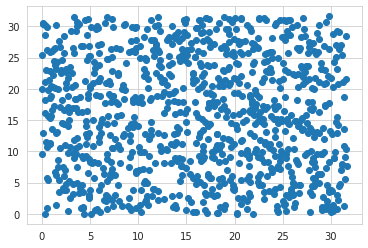

In [13]:
plt.scatter([pt[0] for pt in pts], [pt[1] for pt in pts])

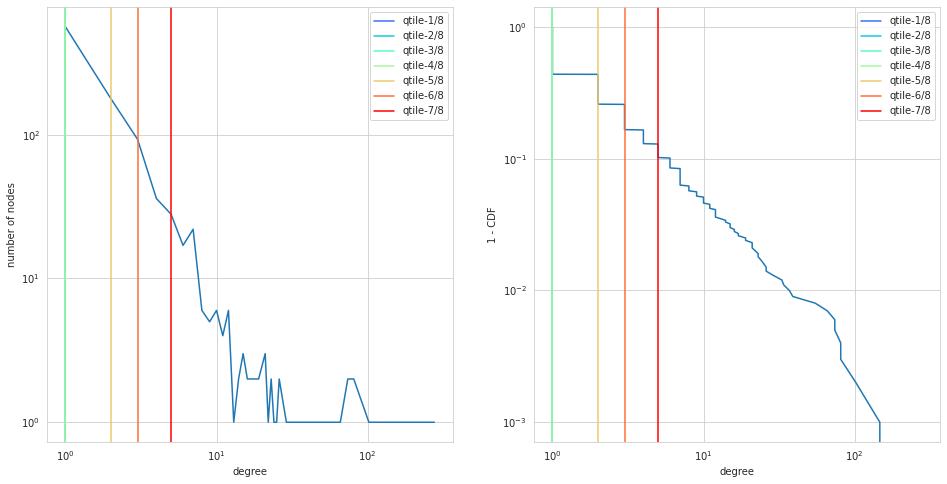

In [22]:
plt.figure(figsize=(16, 8))
plot_degree_dist(np.floor(weights).astype(np.int64), vlines=8)

In [19]:
def plot_degree_dist(g, pl_fit=False, vlines=0):
    if type(g) is nk.graph.Graph:
        dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
    elif type(g) is np.ndarray and np.issubdtype(g.dtype, np.integer):
        dd = sorted(g.astype(np.int64), reverse=True)
    else:
        raise Exception('g should be an nk Graph, or a np.ndarray of integers >=1')
    degrees, numberOfNodes = np.unique(dd, return_counts=True)
    # fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plt.subplot(121)
    # plt.sca(axes[0])
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("number of nodes")
    # plt.scatter(degrees, numberOfNodes, s=1.1, marker='x')
    plt.plot(degrees, numberOfNodes)
    if pl_fit:
        fit = powerlaw.Fit(dd)
        xmin, xmax = fit.xmin, fit.xmax
        fit_bin_edges, fit_bin_proportions = fit.pdf()
        fit_bin_middles = [np.mean((fit_bin_edges[i], fit_bin_edges[i+1]))
                    for i in range(len(fit_bin_edges)-1)]
        plt.plot(fit_bin_middles, fit_pdf * len(fit.data), 'r')
        # plt.axvline(xmin, color='r')
    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()
    # plt.show()
    plt.subplot(122)
    # plt.sca(axes[1])
    # ys, xs, _ = plt.hist(dd, cumulative=True, bins=50, density=True, histtype='step')
    # # plt.clf()   
    # plt.cla()
    # plt.xscale("log")
    # plt.xlabel("degree")
    # plt.yscale("log")
    # plt.ylabel("1 - CDF")
    # # ys[-1] is 1.0, so log(0.0) gives us trouble (but only sometimes idk why)
    # plt.plot(xs[:-1], np.concatenate([1-ys[:-1], 1-ys[-2:-1]]))

    one_minus_cdf = 1. * np.arange(len(dd)) / (len(dd) - 1)
    plt.xscale("log")
    plt.xlabel("degree")
    plt.yscale("log")
    plt.ylabel("1 - CDF")
    plt.plot(dd, one_minus_cdf)

    if vlines > 0:  # plot like quartile lines for number of nodes.
        # rough q-tiles
        q = vlines
        colors = plt.cm.rainbow(np.linspace(0, 1, q))
        rev_dd = list(reversed(dd))
        for i in range(1, q):
            plt.axvline(rev_dd[i * len(dd)//q], label=f'qtile-{i}/{q}', c=colors[i])
        plt.legend()